# Lesson 0001 - Iris Classification Linear Classifier

In this lesson, we will 
-  import the iris data set
-  do some exploratory analysis on this data set
-  build a linear classifier for this data set in tensorflow

We will begin by importing the data set which we can find in the Python package [scikit-learn](https://scikit-learn.org/stable/index.html):

In [1]:
import sklearn as sklearn
from sklearn import datasets

data = datasets.load_iris()

print( sklearn.__version__ )

0.19.1


For reproducability of this lesson, we print the version number of sklearn, which is, in our case, 0.19.1.<br>
Ok, we have loaded the data set and stored the result in __data__. We used the function [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).<br>
We will extract __data_x__, a set of features we will use to classify, and __data_y__, a set of target values which store the classification of each data item.

In [2]:
data_x = data.data

data_y = data.target

Now let's have a look at the entries of __data_x__:

In [3]:
print( data_x[ 0 ] )

[5.1 3.5 1.4 0.2]


Seems like that the data in __data_x__ are numerical data.<br>
Let's have a look at the data in __data_y__:

In [4]:
print( data_y[ 0 ] )

0


It seems, like the data in __data_y__ are also numerical.<br>
Let's find out, how many different values there are in __data_y__.<br>
For this end, we import the Python package [NumPy](http://www.numpy.org/), and from this package, we employ the function [unique](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html):

In [5]:
import numpy as np

print( np.unique( data_y ) )

[0 1 2]


In [6]:
print( np.__version__ )

1.14.3


For reproducability of this notebook, we print the version number of NumPy, in our case 1.14.3.<br>
Now let's find out, how many data items we got:

In [7]:
print( len( data_y ) )

150


Above, we found out, that we have 4 dimensions in __data_x__, so we can plot our data in 4 3-d plots to get some idea of the data set.<br>
We will start by encoding the different classes in different colors:
-  __class 0__ will be blue
-  __class 1__ will be red
-  __class 2__ will be black

In [8]:
colors = []

for i in range( len( data_y ) ):
    
    if data_y[ i ] == 0:
        
        colors.append( 'b' )
        
    elif data_y[ i ] == 1:
        
        colors.append( 'r' )
        
    else:
        
        colors.append( 'k' )

Now, we will import the [Matplotlib](https://matplotlib.org/) which we will use for plotting.<br>
For sake of reproducability, we print the version number of the matplotlib.

In [9]:
import matplotlib as matplotlib
from matplotlib import pyplot as plt

print( matplotlib.__version__ )

2.2.2


For 3-d plotting we import from Matplotlib the [mpl_toolkits](https://matplotlib.org/mpl_toolkits/index.html).

In [10]:
from mpl_toolkits.mplot3d import Axes3D

Now we use from Matplotlib the function [figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) to create a figure into which we plot.<br>
We then add an [Axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) object to that figure, and finally use that Axes object to create a 3-d [Scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html).<br>
Then we employ the function [show](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html) to finally show the plot.<br>
Using the function [title](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html), we assign to each plot, what dimensions are plotted.

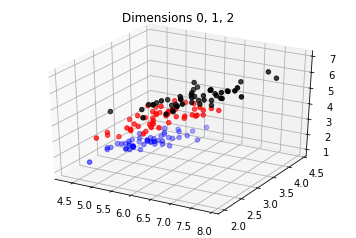

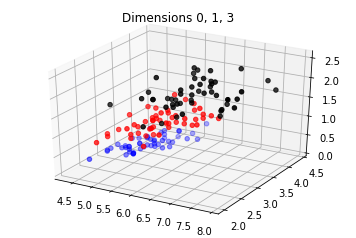

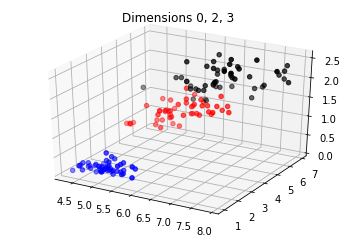

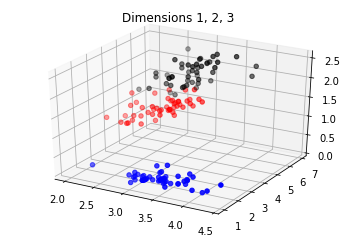

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot( 111, projection = '3d' )

ax.scatter( data_x[ :, 0 ], data_x[ :, 1 ], data_x[ :, 2 ], c = colors )

plt.title( 'Dimensions 0, 1, 2' )

plt.show()



fig = plt.figure()

ax = fig.add_subplot( 111, projection = '3d' )

ax.scatter( data_x[ :, 0 ], data_x[ :, 1 ], data_x[ :, 3 ], c = colors )

plt.title( 'Dimensions 0, 1, 3' )

plt.show()



fig = plt.figure()

ax = fig.add_subplot( 111, projection = '3d' )

ax.scatter( data_x[ :, 0 ], data_x[ :, 2 ], data_x[ :, 3 ], c = colors )

plt.title( 'Dimensions 0, 2, 3' )

plt.show()



fig = plt.figure()

ax = fig.add_subplot( 111, projection = '3d' )

ax.scatter( data_x[ :, 1 ], data_x[ :, 2 ], data_x[ :, 3 ], c = colors )

plt.title( 'Dimensions 1, 2, 3' )

plt.show()

The four plots tell us, that __class 0__ can be separated from the other two classes quite easily, but classes __1__ and __2__ intermingle.<br>
For the next step, we will set a seed for the random number generator. This seed is used as a starting point for the random number generator and will make this lesson reproducable. For this end, we employ the function [seed](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html). 

In [12]:
np.random.seed( 1234567890 )

Next, we will create a vector of $100$ sorted unique random integers. For this end, we employ the functions [choice](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) and [sort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html).<br> 
We will use these $100$ random integers to draw randomly samples from __data_x__ and __data_y__ that we later use to train the classifier. The remaining samples are there to validate the model.

In [13]:
random_integers = np.random.choice( range( 150 ), 100, replace = False )

random_integers = np.sort( random_integers )

Now, we employ the function [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) to create four matrices:
-  the first matrix will have $100$ rows and $4$ columns, this matrix will store the training data from __data_x__
-  the second matrix will have $50$ rows and $4$ columns, this matrix will store the validation data from __data_x__

For the target data, we will employ [one hot encoding](https://en.wikipedia.org/wiki/One-hot). This means, we will map the one dimensional data from __data_y__ to 3d-data, where each data item $i$ assumes the value 
$\delta_{i,j}=\left\{\begin{array}{c}0\text{ if data item }i\text{ is not in class }j\\1\text{ else}\end{array}\right.$<br>
Then one hot encoded target data will be stored in the third and fourth matrices.

In [14]:
train_x = np.zeros( shape = [ 100, 4 ] )

train_y = np.zeros( shape = [ 100, 3 ] )

test_x = np.zeros( shape = [ 50, 4 ] )

test_y = np.zeros( shape = [ 50, 3 ] )



j = 0

k = 0


for i in range( 150 ):
    
    if i == random_integers[ j ]:
        
        train_x[ j, : ] = data_x[ i, : ]
        
        train_y[ j, data_y[ i ] ] = 1.0
        
        j = j + 1
        
        if j == 100:
            
            j = 0
            
    else:
        
        test_x[ k, : ] = data_x[ i, : ]
        
        test_y[ k, data_y[ i ] ] = 1.0
        
        k = k + 1

Now we standardize the data. This means, that we compute for each column in __test_x__ the mean $\mu$ and the standard deviation $\sigma$. We will store these data in the vectors __mu__ and __sigma__ which we create using the function zeros from above. We will compute the mean using the function [mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) and the standard deviation using the function [std](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html).<br>
Once we have computed these values, we map each column __c__ of __train_x__ and __test_x__ to <br>
$c\rightarrow \frac{ c - \mu }{ \sigma }$<br>
This way, we map __train_x__ to a data set which has in each column zero mean and a standard deviation of 1.<br>
In the end of this lesson, we will train a linear classifier using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent), and for this, we will initialize the weights in this classifier randomly with zero mean. If we would not standardize the data, we might get stuck and train a bad model.

In [15]:
mu = np.zeros( shape = [ 4 ] )

sigma = np.zeros( shape = [ 4 ] )



for i in range( 4 ):
    
    mu[ i ] = np.mean( train_x[ :, i ] )
    
    sigma[ i ] = np.std( train_x[ :, i ] )
    
    
for i in range( 4 ):
    
    train_x[ :, i ] = ( train_x[ :, i ] - mu[ i ] ) / sigma[ i ]
    
    test_x[ :, i ] = ( test_x[ :, i ] - mu[ i ] ) / sigma[ i ]

Now we are almost done.<br>
We want to train a model of the form<br>
$c \left( x \right) = W x + b$<br>
where $c \left( x \right)$ is the predicted classification of data item $x$, $W$ is a weight matrix and $b$ is a vector.<br>
We will create this model in tensorflow, therefore we import tensorflow, set the seed for the random number generation in tensorflow (for reproducability) and print the version number of tensorflow. We set the seed using the function [set random seed](https://www.tensorflow.org/api_docs/python/tf/random/set_random_seed).

In [16]:
import tensorflow as tf

tf.random.set_random_seed( 1234567890 )

print( tf.__version__ )

C:\Users\Robert\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


Now we create the [placeholders](https://www.tensorflow.org/api_docs/python/tf/placeholder) __x_tf__ and __y_tf__. These store the training data items from __train_x__ and __train_y__.<br>
Next, we create the [variables](https://www.tensorflow.org/api_docs/python/tf/Variable) __W_tf__ and __b_tf__. __W_tf__ will be a $3 * 4$ matrix storing the weights of matrix $W$, __b_tf__ will be a vector of length $3$ storing the vector $b$.<br>
Then, we combine these data items to the classifier __classifier__ using the function [matmul](https://www.tensorflow.org/api_docs/python/tf/linalg/matmul). 

In [17]:
x_tf = tf.placeholder( tf.float32, shape = [ None, 4 ] )

y_tf = tf.placeholder( tf.float32, shape = [ None, 3 ] )

W_tf = tf.Variable( tf.zeros( [ 4, 3 ] ) )

b_tf = tf.Variable( tf.zeros( [ 3 ] ) )

classifier = tf.matmul( x_tf, W_tf ) + b_tf

The famous mathematician [C. E. Shannon](https://de.wikipedia.org/wiki/Claude_Shannon) presented in his famous paper [A mathematical theory of communications](http://math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf) the idea of entropy of information. In short: the less we know about the outcome of a random experiment, the more information we gain from observing the experiment. For example: if you toss a coin that always ends up showing heads, you gain no information by tossing the coin.<br>
His formula for entropy is<br>
$E=-\sum_{ i } p_{ i } \log \left( p_{ i } \right)$ <br>
where $p_{ i }$ is the probability of event $i$.<br>
This inspired Kullback and Leibler to formulate their [cross entropy](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence). This entropy measures the distance between a distribution $p$ and its approximation $q$.<br>
This cross entropy is<br>
$C=\sum_{ i } p_{ i } \log \left( \frac{ p_{ i } }{ q_{ i } }\right)=\sum_{ i }p_{ i } \log\left( p_{ i }\right)-\sum_{ i }p_{ i }\log\left( q_{ i } \right)$<br>
Now consider our case: if we have a data item $i$ we say<br>
$p_{ i, c } = \left\{\begin{array}{c}1\text{ if data item }i\text{ is in class }c\\0\text{ else}\end{array}\right.$<br>
Our classifier is basically computing a probability $q_{ i, c }$, that assigns how probable it is, that $i$ is in $c$. If our model $q$ were perfect, then the term<br>
$-\sum_{ i }p_{ i }\log\left( q_{ i } \right)$<br>
would be $0$.<br>
Therefore minimizing that last term is equivalent to approximating $p$ by $q$ ideally.<br>
Our classifier will create an output $c \left( x \right)$ which will be three dimensional. We translate this vector of numbers to probabilities by mapping<br>
$c_{ i }\left(x\right) \rightarrow \frac{ e^{ c_{ i }\left( x \right) } }{ \sum_{ j } e^{ c_{ j } \left( x \right) } }$<br>
which is the [soft max function](https://en.wikipedia.org/wiki/Softmax_function).<br>
We employ the function [reduce mean](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean) to compute the mean of the cross entropy applied to the soft max transformed predictions made by our __classifier__ and the true data __y_tf__ using the function [softmax cross entropy with logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2).

In [18]:
cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = classifier, labels = y_tf ) )

We optimize the __cross entropy__ using [gradient descent](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer). We set the learning rate to $0.0001$.

In [19]:
gd = tf.train.GradientDescentOptimizer( 1e-4 ).minimize( cross_entropy )

Now we define a function that decides on each data item whether the prediction made by the __classifier__ is correct.<br>
For this end, we employ the function [argmax](https://www.tensorflow.org/api_docs/python/tf/math/argmax) to return the index of the maximum value in a vector and the function [equal](https://www.tensorflow.org/api_docs/python/tf/math/equal) to return, whether two values are identical. We store the result in __hit__.

In [20]:
hit = tf.equal( tf.argmax( classifier, 1 ), tf.argmax( y_tf, 1 ) )

Now, we transform the result stored in __hit__ to a floating point number using [cast](https://www.tensorflow.org/api_docs/python/tf/dtypes/cast), and then apply reduce mean to compute the mean over a set of __hit__ s to compute the __accuracy__. Since we want the accuracy in $\%$, we multiply the result by $100$.

In [21]:
accuracy = 100 * tf.reduce_mean( tf.cast( hit, tf.float32 ) )

Now we perform the learning.<br>
We create three empty lists, __progress_train_s__, in which we store the accuracy on the current training set, __progress_train__, in which we store the accuracy on the complete training set, and __progress_test__, in which we store the accuracy on the test set.<br>
We train for $500$ iterations, and use in each iteration $30$ randomly drawn data items from the training set to train which are stored in __local_x__ and __local_y__.<br>
We create a tensorflow [session](https://www.tensorflow.org/api_docs/python/tf/Session) __sess__, initialize the variables in our model randomly using [global variables initializer](https://www.tensorflow.org/api_docs/python/tf/initializers/global_variables). We execute the commands for tensorflow using [run](https://www.tensorflow.org/api_docs/java/reference/org/tensorflow/Session.Run).

In [22]:
progress_train_s = []

progress_train = []

progress_test = []


sess = tf.Session()

sess.run( tf.global_variables_initializer() )

for i in range( 500 ):
    
    random_integers = np.random.choice( range( 100 ), 30, replace = False )
    
    local_x = train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
    
    sess.run( gd, feed_dict = { x_tf : local_x, y_tf : local_y } )
    
    progress_train_s.append( sess.run( accuracy, feed_dict = { x_tf : local_x, y_tf : local_y } ) )
    
    progress_train.append( sess.run( accuracy, feed_dict = { x_tf : train_x, y_tf : train_y } ) )
    
    progress_test.append( sess.run( accuracy, feed_dict = { x_tf : test_x, y_tf : test_y } ) )

Now we plot the accuracy we achieved.<br>
We create a [legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) and label the axes using [xlabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html) and [ylabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html).

Text(0,0.5,'Accuracy (%)')

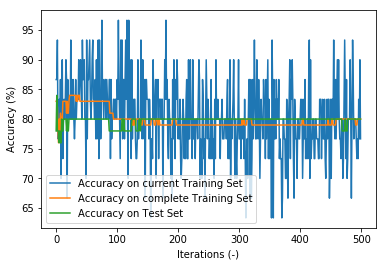

In [23]:
plt.plot( progress_train_s, label = 'Accuracy on current Training Set' )

plt.plot( progress_train, label = 'Accuracy on complete Training Set' )

plt.plot( progress_test, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

We achieve an accuracy of roundabout $80\%$ which is not too bad, but not great either.<br>
But for now, we end this lesson and close __sess__.

In [24]:
sess.close()

Class dismissed.